# Practice Reference and Theory Notebook for Machine Learning
- 31 Aug 2019
- Theory Scrapped from Hands-On ML

# Machine Learning


- Whether or not they are trained with human supervision (supervised, unsupervised, semisupervised, and Reinforcement Learning)
- Whether or not they can learn incrementally on the fly (online versus batch learning)
- Whether they work by simply comparing new data points to known data points, or instead detect patterns in the training data and build a predictive model, much like scientists do (instance-based versus model-based learning)




# Types Of Machine Learning Systems

## Supervised VS Unsupervised learning

### Supervised Learning
- In supervised learning, the training data you feed to the algorithm includes the desired solutions, called labels 
    - k-Nearest Neighbors
    - Linear Regression
    - Logistic Regression
    - Support Vector Machines (SVMs)
    - Decision Trees and Random Forests
    
    - Neural networks

### Unsupervised Learning
- In unsupervised learning, as you might guess, the training data is unlabeled. The system tries to learn without a teacher
    - Clustering
        - k-Means
        - Hierarchical Cluster Analysis (HCA)
        - Expectation Maximization
    - Visualization and dimensionality reduction
        - Principal Component Analysis (PCA)
        - Kernel PCA
        - Locally-Linear Embedding (LLE)
        - t-distributed Stochastic Neighbor Embedding (t-SNE)
    - Association rule learning
        - Apriori
        - Eclat

## Semisupervised Learning
- Some algorithms can deal with partially labeled training data, usually a lot of unla beled data and a little bit of labeled data. This is called semisupervised learning
- Most semisupervised learning algorithms are combinations of unsupervised and supervised algorithms. For example, deep belief networks (DBNs) are based on unsu‐ pervised components called restricted Boltzmann machines (RBMs) stacked on top of one another. RBMs are trained sequentially in an unsupervised manner, and then the whole system is fine-tuned using supervised learning techniques.

## Reinforcement Learning
- Reinforcement Learning is a very different beast. The learning system, called an agent in this context, can observe the environment, select and perform actions, and get rewards in return (or penalties in the form of negative rewards. It must then learn by itself what is the best strategy, called a policy, to get the most reward over time. A policy defines what action the agent should choose when it is in a given situation.

##  Batch And Online Learning

### Batch Learning
- In batch learning, the system is incapable of learning incrementally: it must be trained using all the available data. This will generally take a lot of time and computing resources, so it is typically done offline. First the system is trained, and then it is launched into production and runs without learning anymore; it just applies what it has learned. This is called offline learning.
- If you want a batch learning system to know about new data (such as a new type of spam), you need to train a new version of the system from scratch on the full dataset (not just the new data, but also the old data), then stop the old system and replace it with the new one.

### Online Learning
- In online learning, you train the system incrementally by feeding it data instances sequentially, either individually or by small groups called mini-batches. Each learning step is fast and cheap, so the system can learn about new data on the fly, as it arrives
- Online learning is great for systems that receive data as a continuous flow (e.g., stock prices) and need to adapt to change rapidly or autonomously. It is also a good option if you have limited computing resources: once an online learning system has learned about new data instances, it does not need them anymore, so you can discard them (unless you want to be able to roll back to a previous state and “replay” the data). This can save a huge amount of space.
- Online learning algorithms can also be used to train systems on huge datasets that cannot fit in one machine’s main memory (this is called out-of-core learning). The algorithm loads part of the data, runs a training step on that data, and repeats the process until it has run on all of the data
    - This whole process is usually done offline (i.e., not on the live system), so online learning can be a confusing name. Think of it as incremental learning
- Importance of Learning Rate in Online Learning

## Instance-Based Vs Model-Based Learning

### Instance-Based Learning
- the system learns the examples by heart, then generalizes to new cases using a similarity measure 

### Model-Based Learning
- Another way to generalize from a set of examples is to build a model of these examples, then use that model to make predictions. This is called model-based learning



# Challenges of Machine Learning
- Insuffcient Quantity of Training Data
- Nonrepresentative Training Data
- Poor-Quality Data
- Irrelevant Features
- Overfitting the Training Data
- Underfitting the Training Data


Most Common Supervised Learning Tasks are Classification(predicting classes) And Regression(predicting Values)

# Training Models


# Linear Regression

Equation 4-1. Linear Regression model prediction

y = θ0 + θ1x1 + θ2x2 + ⋯ + θnxn

- ŷ is the predicted value.
- n is the number of features.
- xi is the ith feature value.
- θj is the jth model parameter (including the bias term θ0 and the feature weights θ1 , θ2 , ⋯, θn).


Equation 4-2. Linear Regression model prediction (vectorized form)

y = hθ(x) = θT.x


we use MSE cost Function and then minimise it.

MSE (x , hθ) = 1/m ∑(θT·x(i)− y(i))^2

One way to do this is to use Normal Equation which directly gives us values of theta

θ = ((XT·X)^-1).XT.y

In [1]:
import numpy as np
import seaborn as sns
X=np.arange(100)
delta = np.random.uniform(-36,36, size=(100,))
y=4+3*X+delta
sns.scatterplot(data=y)

In [2]:
X_b=np.c_[np.ones((100,1)),X]
theta_best=np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [3]:
theta_best

array([-1.50156433,  3.03444278])

In [4]:
X_new = np.arange(100)
X_new_b = np.c_[np.ones((100, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)



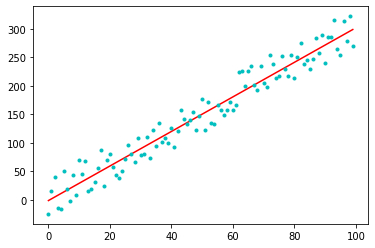

In [5]:
import matplotlib.pyplot as plt
plt.plot( y_predict, "r-")
plt.plot( y, "c.")
plt.show()

- The Normal Equation gets very slow when the number of features grows large (e.g., 100,000).

- The Normal Equation computes the inverse of XT · X, which is an n × n matrix (where n is the number of features). The computational complexity of inverting such a matrix is typically about O(n 2.4) to O(n 3 ) (depending on the implementation). In other words, if you double the number of features, you multiply the computation time by roughly 22.4 = 5.3 to 23  = 8.
 
- On the positive side, this equation is linear with regards to the number of instances in the training set (it is O(m)), so it handles large training sets efficiently, provided they can fit in memory.



### Gradient Descent
Gradient Descent is a very generic optimization algorithm capable of finding optimal
solutions to a wide range of problems. The general idea of Gradient Descent is to
tweak parameters iteratively in order to minimize a cost function.you start by filling θ with random values (this is called random initializa‐
tion), and then you improve it gradually, taking one baby step at a time, each step
attempting to decrease the cost function (e.g., the MSE), until the algorithm converges
to a minimum.
An important parameter in Gradient Descent is the size of the steps, determined by
the learning rate hyperparameter. If the learning rate is too small, then the algorithm
will have to go through many iterations to converge, which will take a long time.
On the other hand, if the learning rate is too high, you might jump across the valley
and end up on the other side, possibly even higher up than you were before. This
might make the algorithm diverge, with larger and larger values, failing to find a good
solution


### When using Gradient Descent, you should ensure that all features have a similar scale (e.g., using Scikit-Learn’s StandardScaler class), or else it will take much longer to converge.

# Batch Gradient Descent

# Fix This Code
## probably not working because gradient descent requires scaled data and this is not scaled?

[[14.37419115]
 [19.51235628]]


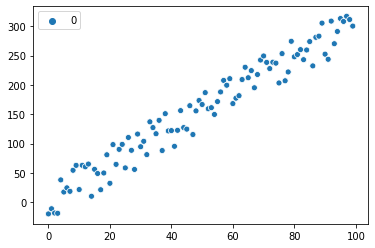

In [6]:
X=np.arange(100)
delta = np.random.uniform(-36,36,100)
y=4+3*X+delta
y=y.reshape((100,1))
sns.scatterplot(data=y)
X_b=np.c_[np.ones((100,1)),X]
eta = 0.1 # learning rate
n_iterations = 100
m = 100
theta = np.random.randn(2,1)+16
print(theta)# random initialization
# print(X_b.shape)
# print(X_b.T.shape)
# print(theta.shape)
# print(y.shape)
# print((np.subtract(np.dot(X_b,theta),y)).shape)
for iteration in range(n_iterations):
    gradients = 2/m*X_b.T.dot(X_b.dot(theta)-y)
    #print(gradients.shape)
    theta = theta + eta*gradients


In [7]:

theta


array([[1.62267689e+281],
       [1.07629250e+283]])

# Stochastic Gradient Descent

- The main problem with Batch Gradient Descent is the fact that it uses the whole training set to compute the gradients at every step, which makes it very slow when the training set is large. At the opposite extreme, Stochastic Gradient Descent just picks a random instance in the training set at every step and computes the gradients based only on that single instance. Obviously this makes the algorithm much faster since it has very little data to manipulate at every iteration. It also makes it possible to train on huge training sets, since only one instance needs to be in memory at each iteration (SGD can be implemented as an out-of-core algorithm.)
- On the other hand, due to its stochastic (i.e., random) nature, this algorithm is much less regular than Batch Gradient Descent: instead of gently decreasing until it reaches the minimum, the cost function will bounce up and down, decreasing only on average. Over time it will end up very close to the minimum, but once it gets there it will continue to bounce around, never settling down 

In [8]:
X_b=X_b.reshape(100,2)
y=y.reshape(100,1)

```python
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())
```



### Mini-batch Gradient Descent



-  Mini-batch GD computes the gradients on small random sets of instances called minibatches
-  The main advantage of Mini-batch GD over Stochastic GD is that you can get a performance boost from hardware optimization of matrix operations, especially when using GPUs.

In [9]:
"""
Algorithm           Large m     Out-of-core support      Large n     Hyperparams     Scaling required      Scikit-Learn
Normal Equation     Fast        No                       Slow        0               No                    LinearRegression
Batch GD            Slow        No                       Fast        2               Yes                   n/a
Stochastic GD       Fast        Yes                      Fast        ≥2              Yes                   SGDRegressor
Mini-batch GD       Fast        Yes                      Fast        ≥2              Yes                   n/a

"""

'\nAlgorithm           Large m     Out-of-core support      Large n     Hyperparams     Scaling required      Scikit-Learn\nNormal Equation     Fast        No                       Slow        0               No                    LinearRegression\nBatch GD            Slow        No                       Fast        2               Yes                   n/a\nStochastic GD       Fast        Yes                      Fast        ≥2              Yes                   SGDRegressor\nMini-batch GD       Fast        Yes                      Fast        ≥2              Yes                   n/a\n\n'

## Polynomial Regression
What if your data is actually more complex than a simple straight line? Surprisingly,
you can actually use a linear model to fit nonlinear data. A simple way to do this is to
add powers of each feature as new features, then train a linear model on this extended
set of features. This technique is called Polynomial Regression.


In [10]:
m = 100
X = np.arange(-100,100).reshape(200,1)
y = 0.5 * X**2 + X + 2 + 700*np.random.randn(200,1)

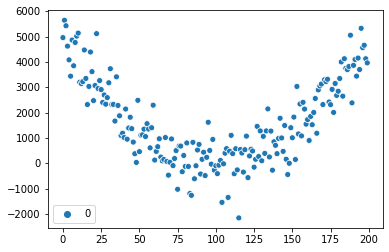

In [11]:
sns.scatterplot(data=y)

In [12]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_


(array([-25.54983078]), array([[-0.33829126,  0.4993949 ]]))

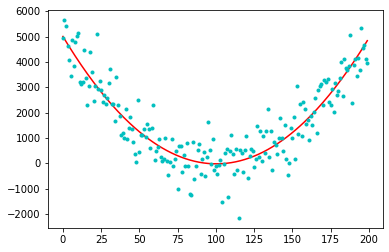

In [13]:
 # add x0 = 1 to each instance
y_predict = lin_reg.predict(X_poly)
plt.plot( y_predict, "r-")
plt.plot(y,"c.")
plt.show()

## Examples of Overfitting

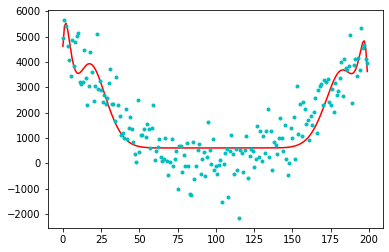

In [14]:
poly_features = PolynomialFeatures(degree=20, include_bias=False)
X_poly = poly_features.fit_transform(X)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_
y_predict = lin_reg.predict(X_poly)
plt.plot( y_predict, "r-")
plt.plot(y,"c.")
plt.show()


### using pipelining for polynomial regression
```python
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline((
 ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
 ("sgd_reg", LinearRegression()),
 ))
plot_learning_curves(polynomial_regression, X, y)
```


# About Learning Curves

### Learning curves code from Hands-On Ml

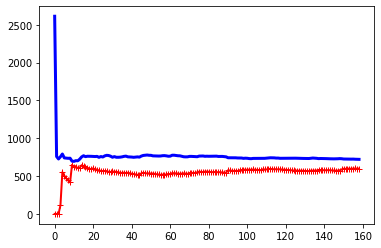

In [15]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train") 
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

X = np.arange(-100,100).reshape(200,1)
y = 0.5 * X**2 + X + 2 + 700*np.random.randn(200,1)

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X_poly, y)

- One way to improve an overfitting model is to feed it more training data until the validation error reaches the training error

### Learning Curves Topic requires more theory add here!!!

##### The Bias/Variance Tradeoff
- a model’s generalization error can be expressed as the sum of three very different errors:
###### Bais
- This part of the generalization error is due to wrong assumptions, such as assum‐ ing that the data is linear when it is actually quadratic. A high-bias model is most likely to underfit the training data.
###### Variance
- This part is due to the model’s excessive sensitivity to small variations in the training data. A model with many degrees of freedom (such as a high-degree polynomial model) is likely to have high variance, and thus to overfit the training data
###### Irreducible error
- This part is due to the noisiness of the data itself. The only way to reduce this part of the error is to clean up the data (e.g., fix the data sources, such as broken sensors, or detect and remove outliers)

# Regularuized Linear Models

## Ridge Regression

_*Ridge Regression*_ (also called Tikhonov regularization) is a regularized version of Lin‐
ear Regression: a regularization term equal to α∑θ(i)^2
 is added to the cost function.
This forces the learning algorithm to not only fit the data but also keep the model
weights as small as possible. Note that the regularization term should only be added
to the cost function during training. Once the model is trained, you want to evaluate
the model’s performance using the unregularized performance measure.

##### It is important to scale the data (e.g., using a StandardScaler) before performing Ridge Regression, as it is sensitive to the scale of the input features. This is true of most regularized models

J(θ)=MSE(θ)+α*0.5*∑θ(i)^2


### Ridge Regression Closed Form

θ = ((XT·X + αA)^-1)·XT·Y

A is the n × n identity
matrix13 except with a 0 in the top-left cell, corresponding to the bias term

code example

```python
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])
```



#### in layman terms using ridge regression flattens the prediction line. write code to check this for yourself. plot prediction line for different values of alpha


## Lasso Regression

Least Absolute Shrinkage and Selection Operator Regression (simply called Lasso
Regression) is another regularized version of Linear Regression: just like Ridge
Regression, it adds a regularization term to the cost function, but it uses the ℓ1 norm
of the weight vector instead of half the square of the ℓ2
 norm 

J(θ) = MSE(θ) + α∑|θi|


### An important characteristic of Lasso Regression is that it tends to completely eliminate the weights of the least important features (i.e., set them to zero). 

```python
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])
```

## Elastic Net

Elastic Net is a middle ground between Ridge Regression and Lasso Regression. The
regularization term is a simple mix of both Ridge and Lasso’s regularization terms,
and you can control the mix ratio r. When r = 0, Elastic Net is equivalent to Ridge
Regression, and when r = 1, it is equivalent to Lasso Regression 

J(θ) = MSE(θ) + rα∑|θi| + ((1 − r)/2)*α∑(θi)^2
```python
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])
```

## Important(when to use what kind Of regression)

####  It is almost always preferable to have at least a little bit of regularization, so generally you should avoid plain Linear Regression. Ridge is a good default, but if you suspect that only a few features are actually useful, you should prefer Lasso or Elastic Net since they tend to reduce the useless features’ weights down to zero as we have discussed. In general, Elastic Net is preferred over Lasso since Lasso may behave erratically when the num‐ ber of features is greater than the number of training instances or when several fea‐ tures are strongly correlated.


## Early Stopping



## Logistic Regression

__Logistic Regression__ (also called Logit Regression) is commonly used to estimate the probability that an instance belongs to a particular class
(e.g., what is the probability that this email is spam?). If the estimated probability is
greater than 50%, then the model predicts that the instance belongs to that class
(called the positive class, labeled “1”), or else it predicts that it does not (i.e., it
belongs to the negative class, labeled “0”). This makes it a binary classifier.
> Just like a Linear Regression model, a Logistic Regression
model computes a weighted sum of the input features (plus a bias term), but instead
of outputting the result directly like the Linear Regression model does, it outputs the
logistic of this result

>  Logistic Regression model estimated probability (vectorized form)

p = hθ(x) = σ(θT.x)
The logistic—also called the logit, noted σ(·)—is a sigmoid function (i.e., S-shaped)
that outputs a number between 0 and 1. 


## Sigmoid Function


In [31]:
x1=np.arange(-10,10).reshape(20,1)

In [32]:
sigma = 1/(1+np.exp(-1*x))

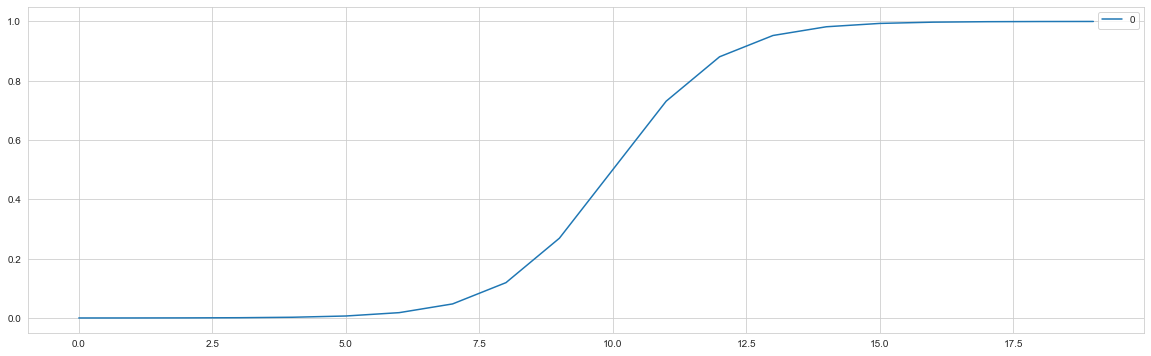

In [35]:
plt.figure(figsize=(20,6))
sns.set_style("whitegrid")
sns.lineplot(data=sigma)

> Logistic Regression cost function (log loss)

J(θ)= −1/m∑(y(i)log(p(i))+ (1 − y(i))log( 1 − p(i))

> Logistic cost function partial derivatives

(∂/∂θj)(J(θ)) = (1/m) ∑ (σ(θT·x(i))− y(i))xj(i)

In [3]:
from sklearn import datasets
import numpy as np
iris=datasets.load_iris()
list(iris.keys())
x=iris["data"][:,3:]
y=(iris["target"]==2).astype(np.int)

In [4]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()

In [22]:
log_reg.fit(x,y)

K:\Anaconda\envs\tensorflow-gpu\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

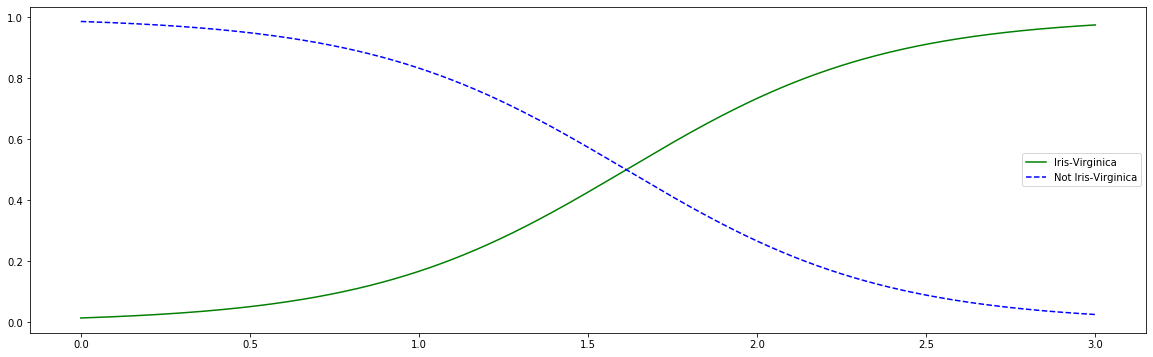

In [25]:
X_new=np.linspace(0,3,1000).reshape(-1,1)
y_proba=log_reg.predict_proba(X_new)
import matplotlib.pyplot as plt
plt.figure(figsize=(20,6))
plt.plot(X_new,y_proba[:,1],"g-",label="Iris-Virginica")
plt.plot(X_new,y_proba[:,0],"b--",label="Not Iris-Virginica")
plt.legend()
plt.show()

## Softmax Regression

The Logistic Regression model can be generalized to support multiple classes directly,
without having to train and combine multiple binary classifiers 
This is called Softmax Regression, or Multinomial Logistic Regression.
>  Softmax score for class k


sk(x) = θkT·x
